In [1]:
import numpy as np
import cv2

## quang sẽ làm phần các bộ lọc - thêm nhiễu

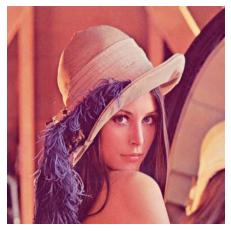

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import cv2

i = cv2.imread("lenna.png")
i = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(i)
plt.show()


## thêm nhiễu
### 1. Gauss

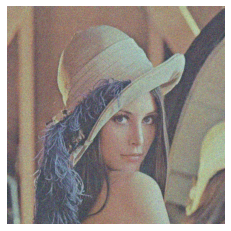

In [3]:
def add_gauss_noise(i: np.array, s: float) -> np.array:
    gauss = np.random.normal(loc=0, scale=s, size=i.shape) + i
    gauss = (gauss - np.amin(gauss.reshape(-1, 3), axis=0)) / (
            np.amax(gauss.reshape(-1, 3), axis=0) - np.amin(gauss.reshape(-1, 3), axis=0)) * 255
    gauss = gauss.astype(int)
    return gauss


gauss = add_gauss_noise(i, 30)
plt.axis('off')
plt.imshow(gauss)
plt.show()


### 2. Impulsive

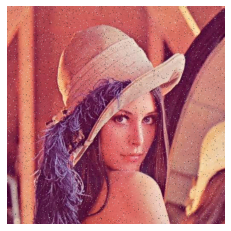

In [4]:
def add_impulsive_noise(i: np.array, ratio: float) -> np.array:
    import copy
    # random position
    i_p = copy.deepcopy(i).reshape(-1, 3)
    total_pos = i_p.shape[0]
    pos = total_pos * np.random.rand(int(total_pos * ratio))
    pos = pos.astype(int)
    for p in pos:
        is_salt = np.random.ranf() > 0.5
        if is_salt:
            i_p[p] = [0, 0, 0]
        else:
            i_p[p] = [255, 255, 255]
    return i_p.reshape(i.shape)


impulsive = add_impulsive_noise(i, 0.02)
plt.axis('off')
plt.imshow(impulsive)
plt.show()

ANMF


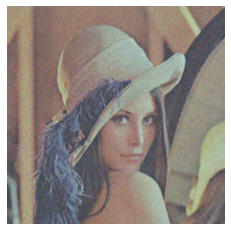

D:\pj\imageprocessing\filter.py:99: RuntimeWarning: divide by zero encountered in double_scalars
  ws = [hl(n, k, ys, yl, M) ** (-M) * K((y - yl) / hl(n, k, ys, yl, M)) for yl in ys]
D:\pj\imageprocessing\filter.py:99: RuntimeWarning: invalid value encountered in true_divide
  ws = [hl(n, k, ys, yl, M) ** (-M) * K((y - yl) / hl(n, k, ys, yl, M)) for yl in ys]
D:\pj\imageprocessing\filter.py:99: RuntimeWarning: divide by zero encountered in true_divide
  ws = [hl(n, k, ys, yl, M) ** (-M) * K((y - yl) / hl(n, k, ys, yl, M)) for yl in ys]
D:\pj\imageprocessing\filter.py:99: RuntimeWarning: invalid value encountered in double_scalars
  ws = [hl(n, k, ys, yl, M) ** (-M) * K((y - yl) / hl(n, k, ys, yl, M)) for yl in ys]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


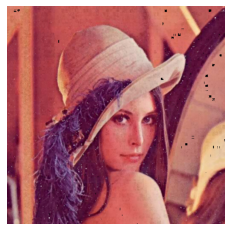

AVMF


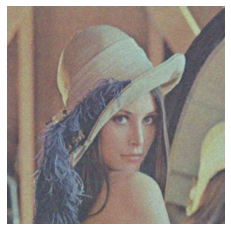

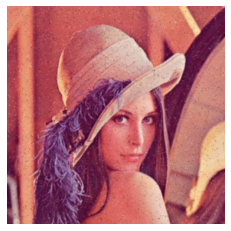

DDF


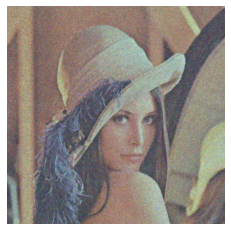

D:\pj\imageprocessing\filter.py:49: RuntimeWarning: invalid value encountered in true_divide
  l2 = window / np.linalg.norm(window, axis=-1)[..., None]


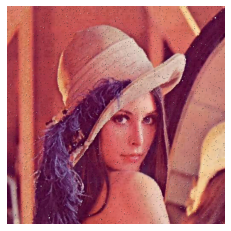

GVDF


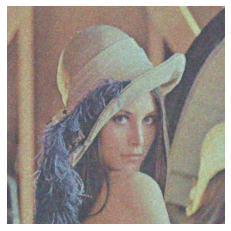

D:\pj\imageprocessing\filter.py:65: RuntimeWarning: invalid value encountered in true_divide
  l2 = window / np.linalg.norm(window, axis=-1)[..., None]


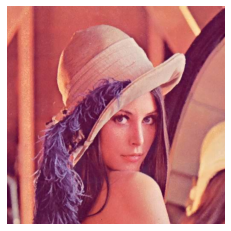

In [6]:
from filter import *


def filter_plot(i: np.array, filter) -> np.array:
    filtered = filter(i)
    plt.axis('off')
    plt.imshow(filtered)
    plt.show()
    return filtered


filters = [
    ANMF,
    AVMF,
    DDF,
    GVDF
]
for filter in filters:
    print(filter.__name__)
    a = filter_plot(gauss, filter)
    b = filter_plot(impulsive, filter)
    np.save(f'{filter.__name__}_lenna_gauss.npy', a)
    np.save(f'{filter.__name__}_lenna_impulsive.npy', b)

## tuấn cài các công cụ đánh giá

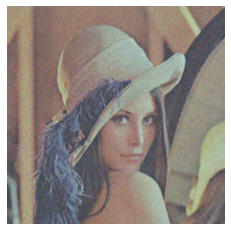

In [7]:
image  = np.load('ANMF_lenna_gauss.npy')
plt.axis('off')
plt.imshow(image)
plt.show()